# **Part B**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,datasets,models

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import Resizing
resize_layer = Resizing(32,32)
x_train = resize_layer(x_train)
x_test = resize_layer(x_test)

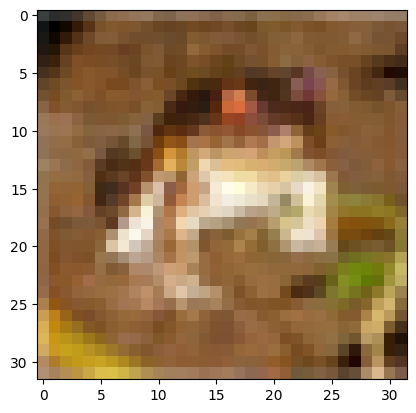

In [ ]:
plt.imshow(x_train[0])

You have learnt about data augmentation in the theoretical assignment, Now you need to use it in the above dataset (You can do it using ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

In [ ]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

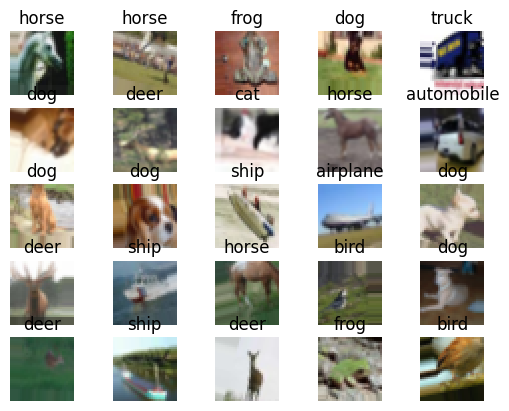

In [ ]:
datagen.fit(x_train)
augmented_images = []
augmented_labels = []
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=32):
    augmented_images.extend(x_batch)
    augmented_labels.extend(y_batch)
    if len(augmented_images) >= 500:
        break
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.title(labels[augmented_labels[i][0]])
    plt.grid(False)
    plt.axis('off')
    plt.imshow(augmented_images[i])
plt.show()

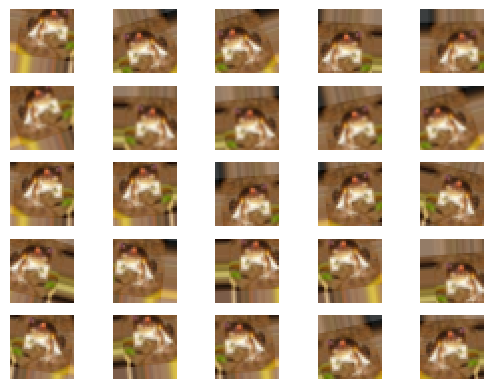

In [ ]:
augmented_images2 = []
x=np.array(x_train[0])
x=x.reshape(1,32,32,3)
for output in datagen.flow(x, batch_size=1):
    #print(output.shape)
    augmented_images2.append(output[0])
    if len(augmented_images2) >= 25:
        break
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.axis('off')
    plt.imshow(augmented_images2[i])
plt.show()

Use Visualization libraries to see how data augmentation works.

In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from sklearn.model_selection import train_test_split
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

Train a CNN model of your choice and evaluate on the test data using weighted F1 scores ( Do not just try with a single model use multiple models, for example- one with transfer learning or with a different model architecture) at the end compare the performance of the models, and write what do you infer from the same

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
print(x_train_resized.shape)
print(y_train.shape)
print(x_test_resized.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(45000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
352/352 [==============================] - 631s 2s/step - loss: 1.3335 - accuracy: 0.5372 - val_loss: 1.2914 - val_accuracy: 0.5406
Epoch 2/10
352/352 [==============================] - 628s 2s/step - loss: 1.2491 - accuracy: 0.5673 - val_loss: 1.2400 - val_accuracy: 0.5612
Epoch 3/10
352/352 [==============================] - 627s 2s/step - loss: 1.2103 - accuracy: 0.5794 - val_loss: 1.2268 - val_accuracy: 0.5662
Epoch 4/10
352/352 [==============================] - 634s 2s/step - loss: 1.1828 - accuracy: 0.5896 - val_loss: 1.1985 - val_accuracy: 0.5786
Epoch 5/10
352/352 [==============================] - 627s 2s/step - loss: 1.1664 - accuracy: 0.5953 - val_loss: 1.1999 - val_accuracy: 0.5798
Epoch 6/10
352/352 [==============================] - 632s 2s/step - loss: 1.1508 - accuracy: 0.5997 - val_loss: 1.1836 - val_accuracy: 0.5808
Epoch 7/10
352/352 [==============================] - 615s 2s/step - loss: 1.1391 - accuracy: 0.6033 - val_loss: 1.1794 - val_accuracy: 0.5910

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 143s 456ms/step - loss: 1.1916 - accuracy: 0.5878
Test accuracy: 0.5878000259399414
